<a href="https://colab.research.google.com/github/cs-deep-quickdraw/notebooks/blob/master/notebooks/dl_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget 'https://raw.githubusercontent.com/cs-deep-quickdraw/notebooks/master/100_classes.txt'
!mkdir data

--2020-02-17 16:22:07--  https://raw.githubusercontent.com/cs-deep-quickdraw/notebooks/master/100_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘100_classes.txt’

100_classes.txt     100%[===================>]     760  --.-KB/s    in 0s      

2020-02-17 16:22:07 (58.4 MB/s) - ‘100_classes.txt’ saved [760/760]



In [0]:
import urllib.request

f = open("100_classes.txt","r")
# And for reading use
classes = [cls.strip() for cls in f.readlines()]
f.close()

def download(classes):
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for i, c in enumerate(classes):
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print((1+i)/len(classes), c, path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [0]:
download(classes)

0.01 drums https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
0.02 sun https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
0.03 laptop https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
0.04 anvil https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
0.05 baseball_bat https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
0.06 ladder https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
0.07 eyeglasses https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
0.08 grapes https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
0.09 book https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
0.1 dumbbell https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
0.11 traffic_light https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/tra

In [1]:
!ls data

airplane.npy	  circle.npy	    key.npy	      shorts.npy
alarm_clock.npy   clock.npy	    knife.npy	      shovel.npy
anvil.npy	  cloud.npy	    ladder.npy	      smiley_face.npy
apple.npy	  coffee_cup.npy    laptop.npy	      snake.npy
axe.npy		  cookie.npy	    light_bulb.npy    sock.npy
baseball_bat.npy  cup.npy	    lightning.npy     spider.npy
baseball.npy	  diving_board.npy  line.npy	      spoon.npy
basketball.npy	  donut.npy	    lollipop.npy      square.npy
beard.npy	  door.npy	    microphone.npy    star.npy
bed.npy		  drums.npy	    moon.npy	      stop_sign.npy
bench.npy	  dumbbell.npy	    mountain.npy      suitcase.npy
bicycle.npy	  envelope.npy	    moustache.npy     sun.npy
bird.npy	  eyeglasses.npy    mushroom.npy      sword.npy
book.npy	  eye.npy	    pants.npy	      syringe.npy
bread.npy	  face.npy	    paper_clip.npy    table.npy
bridge.npy	  fan.npy	    pencil.npy	      tennis_racquet.npy
broom.npy	  flower.npy	    pillow.npy	      tent.npy
butterfly.npy	  frying_pan.npy    pizza.np

Test class: drums


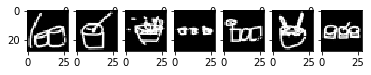

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Display one image
test_cls = np.load(f'data/{classes[0]}.npy')
print(f"Test class: {classes[0]}")

f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7)

ax1.imshow(test_cls[0].reshape(28, 28), cmap='gray')
ax2.imshow(test_cls[1].reshape(28, 28), cmap='gray')
ax3.imshow(test_cls[2].reshape(28, 28), cmap='gray')
ax4.imshow(test_cls[3].reshape(28, 28), cmap='gray')
ax5.imshow(test_cls[26001].reshape(28, 28), cmap='gray')
ax6.imshow(test_cls[26002].reshape(28, 28), cmap='gray')
ax7.imshow(test_cls[26003].reshape(28, 28), cmap='gray')

In [11]:
print(len(test_cls))

137299


In [12]:
# check_classes = []
# for i in range(100):
#   check_classes.append(len(np.load(f'data/{classes[i]}.npy')))
# print(check_classes)
# print(min(check_classes))
# print(max(check_classes))
print('from 113862 to 290239 images per class')

from 113862 to 290239 images per class


In [0]:
N_TEST = 20_000 # first 20k images are for test purpose

In [0]:
import pandas as pd
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


class DrawDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        assert len(self.X) == len(self.Y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        return [torch.Tensor(self.X[idx]).type('torch.FloatTensor'), self.Y[idx]]

def load_dataset(max_classes=10, max_images_per_class=20000):
  X = None
  Y = []

  for i, cls in enumerate(classes[:max_classes]):
    data = np.load(f'data/{cls}.npy')[N_TEST:N_TEST+max_images_per_class].reshape(max_images_per_class, 1, 28, 28)
    if X is not None:
      X = np.concatenate((X, data))
    else:
      X = data

    Y.extend([i for _ in range(max_images_per_class)])

  return DrawDataset(X, Y)

In [0]:
dataset = load_dataset(max_classes=100, max_images_per_class=20000)
# TODO: we should do cross-validation here
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [int(0.8*len(dataset)), int(0.2*len(dataset))])

In [16]:
print(len(train_dataset))
print(train_dataset[0][0].shape)

1600000
torch.Size([1, 28, 28])


In [0]:
# print(train_dataset[0][0])

In [18]:
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device = {}'.format(device))

device = cuda


In [0]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
                 dataset=train_dataset,
                 batch_size=batch_size,
                 shuffle=True)

val_loader = torch.utils.data.DataLoader(
                 dataset=val_dataset,
                 batch_size=batch_size,
                 shuffle=False)

In [20]:
print('total training batch number: {}'.format(len(train_loader)))
print('total validation batch number: {}'.format(len(val_loader)))

total training batch number: 25000
total validation batch number: 6250


In [0]:
# display some images
# for an alternative see https://pytorch.org/tutorials/advanced/neural_style_tutorial.html
# def imshow(tensor, title=None):
#     img = tensor.cpu().clone()
#     img = img.squeeze()
#     plt.imshow(img, cmap='gray')
#     if title is not None:
#         plt.title(title)
#     plt.pause(0.5)

# plt.figure()
# for ii in range(10):
#     imshow(train_dataset[ii][0] , title='Example ({})'.format(classes[train_dataset[ii][1]]))
# plt.close()

In [0]:
# define MLP model
DATA_SIZE = 784
NUM_HIDDEN_1 = 512 # try 512
NUM_HIDDEN_2 = 256
NUM_CLASSES = 100

class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(DATA_SIZE, NUM_HIDDEN_1)
        self.fc2 = nn.Linear(NUM_HIDDEN_1, NUM_HIDDEN_2)
        self.fc3 = nn.Linear(NUM_HIDDEN_2, NUM_CLASSES)
    def forward(self, x):
        x = x.view(-1, DATA_SIZE) # reshape the tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [0]:
# define CNN model
NUM_CONV_1=32
NUM_CONV_2=64
NUM_FC=1024
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet,self).__init__()
        self.conv_1 = nn.Conv2d(1,NUM_CONV_1,5,1) # kernel_size = 5
        self.conv_2 = nn.Conv2d(NUM_CONV_1,NUM_CONV_2,5,1) # kernel_size = 5
        self.drop = nn.Dropout2d()
        self.fc_1 = nn.Linear(4*4*NUM_CONV_2, NUM_FC)
        self.fc_2 = nn.Linear(NUM_FC,NUM_CLASSES)
    def forward(self,x):
        x = F.relu(self.conv_1(x))
        x = F.max_pool2d(x, 2,2)
        # x = F.relu(self.conv_2(x))
        x = F.relu(self.drop(self.conv_2(x)))
        x = F.max_pool2d(x, 2,2)
        x = x.view(-1,4*4*NUM_CONV_2)
        x = F.relu(self.fc_1(x))
        x = self.fc_2(x)
        return x
        # en utilisant loss = F.nll_loss(output, target) on peut faire
        # return F.log_softmax(x, dim=1)

In [0]:
import torchvision.models as models
resnet = models.resnet18(pretrained=False)
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
# resnet.co = torch.nn.Linear(512, 102, bias = True)
# resnet.co = torch.nn.Linear(512 * resnet.layer1[0].expansion,1)

In [0]:
# define model (choose MLP or CNN)
# model = MLPNet()
# model = CNNNet()
model = resnet

In [33]:
model.to(device) # puts model on GPU / CPU


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
# optimization hyperparameters
optimizer = torch.optim.SGD(model.parameters(), lr = 0.005)
# optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)

loss_fn = nn.CrossEntropyLoss()

In [35]:
# main loop (train+test)
N_EPOCHS = 10
for epoch in range(N_EPOCHS):
    losses = []
    # training
    model.train() # mode "train" agit sur "dropout" ou "batchnorm"
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        x, target = Variable(x).to(device), Variable(target).to(device)
        out = model(x)
        loss = loss_fn(out, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        # if batch_idx %100 ==0:
        #     print('epoch {} batch {} [{}/{}] training loss: {}'.format(epoch,batch_idx,batch_idx*len(x),
        #             len(train_loader.dataset),loss.item()))

    # testing
    model.eval()
    correct = 0
    with torch.no_grad():
        for batch_idx, (x, target) in enumerate(val_loader):
            x, target = x.to(device), target.to(device)
            out = model(x)
            loss = loss_fn(out, target)
            # _, prediction = torch.max(out.data, 1)
            prediction = out.argmax(dim=1, keepdim=True) # index of the max log-probability
            correct += prediction.eq(target.view_as(prediction)).sum().item()
    taux_classif = 100. * correct / len(val_loader.dataset)
    print(f'Epoch {epoch+1}/{N_EPOCHS}: Loss: {np.mean(losses)}, Val Accuracy: {correct}/{len(val_loader.dataset)} (tx {taux_classif}%, err {100.-taux_classif}%)\n')

Epoch 1/10: Loss: 1.1501512489032746, Val Accuracy: 314111/400000 (tx 78.52775%, err 21.472250000000003%)

Epoch 2/10: Loss: 0.7883832345503569, Val Accuracy: 323369/400000 (tx 80.84225%, err 19.157749999999993%)

Epoch 3/10: Loss: 0.7020196860712766, Val Accuracy: 327910/400000 (tx 81.9775%, err 18.022499999999994%)

Epoch 4/10: Loss: 0.6505148977184295, Val Accuracy: 330425/400000 (tx 82.60625%, err 17.393749999999997%)

Epoch 5/10: Loss: 0.6117653136605025, Val Accuracy: 331672/400000 (tx 82.918%, err 17.081999999999994%)

Epoch 6/10: Loss: 0.5815117141139508, Val Accuracy: 333296/400000 (tx 83.324%, err 16.676000000000002%)

Epoch 7/10: Loss: 0.5553202882653475, Val Accuracy: 334004/400000 (tx 83.501%, err 16.498999999999995%)

Epoch 8/10: Loss: 0.5316642516076565, Val Accuracy: 334339/400000 (tx 83.58475%, err 16.41525%)

Epoch 9/10: Loss: 0.5103664493459463, Val Accuracy: 334885/400000 (tx 83.72125%, err 16.278750000000002%)

Epoch 10/10: Loss: 0.4904812931293249, Val Accuracy: 3